In [465]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data=pd.read_csv("train.csv")
titanic_data.head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [466]:
print("# of passengers in original data:" + str(len(titanic_data.index)))

# of passengers in original data:891


## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

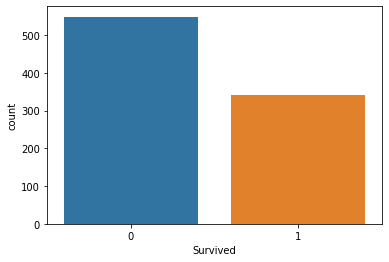

In [467]:
sns.countplot(x="Survived", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

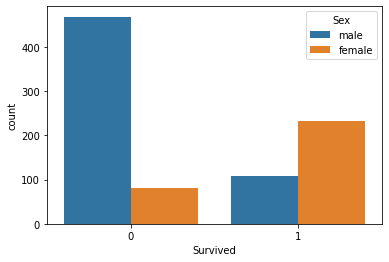

In [468]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)
#this shows the amount of male vs female in a different color for each gender
# both for those who did not survive (value of zero) and did survive (value of 1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

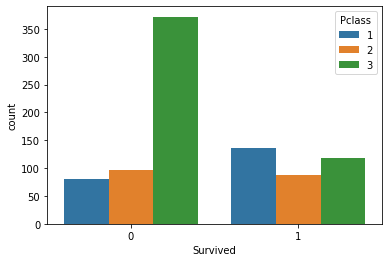

In [469]:
# we can see that a majority of males did not survive, whereas a majority of females did survive
# In the next plot we split survivors by their passenger class.  As we
# can see, a majority of non-survivors were third class passengers, whereas
# the survivor class is more evenly split
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

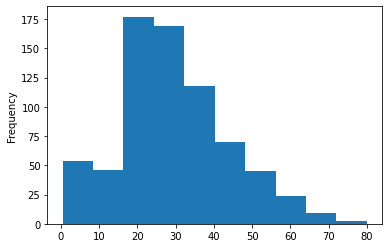

In [470]:
#next we plot the age distrubtion by declaring an array and passing a 
#variable that is age
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

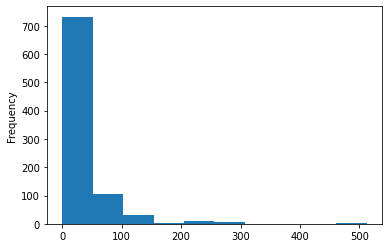

In [471]:
#from this graph we can see that most of the passengers were in the 20s and 30s
#age range on the ship
#we next plot a fare histogram to get an idea of the distribution of prices paid
#for voyage on the ship
titanic_data["Fare"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

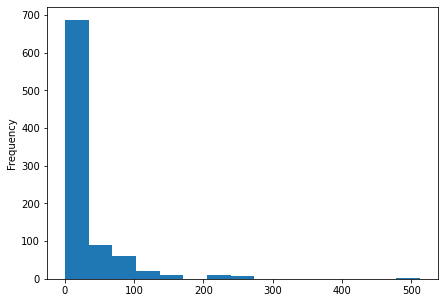

In [472]:
#from here we can see the fare size is between 0-100 but not clear. To
#make clear, we reset the bin size, and the figure size

titanic_data["Fare"].plot.hist(bins=15, figsize=(7,5))

In [473]:
#next we analyze the other columns as well
#to inspect we first enter in
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

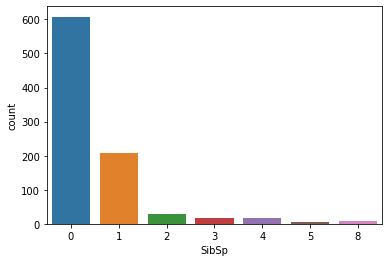

In [474]:
#variables of interest begin from SibSp, so we start from there
sns.countplot(x="SibSp",data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

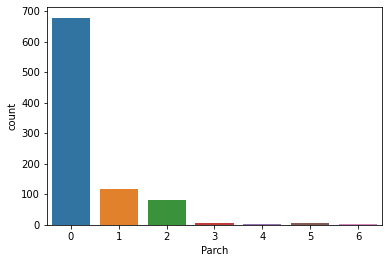

In [475]:
#from this graph we can see mostly passengers did not have siblings or spouse on board
#a few had one spouse or sibling, and hardly any had more
#next we can inspect Parch, or parents and children on board
#we plot in the same manner
sns.countplot(x="Parch", data=titanic_data)

In [476]:
#here too we see a similar trend as with siblings

## Data Wrangling

In [477]:
#we move on to the next step of data wrangling, where we clean our data
#we need to move null or NaN (not an number) values
#we first check what values are null - true is where values are null
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [478]:
#we can print the number of passengers which are null by summing over the passengers
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

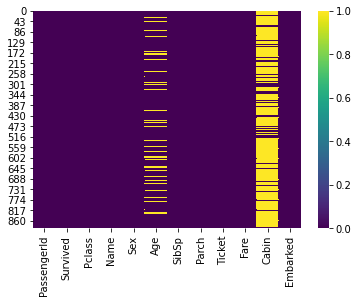

In [479]:
#if we don't want to use numbers we can also plot a heatmap, yellow is
#null and purple is not null
sns.heatmap(titanic_data.isnull(), cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

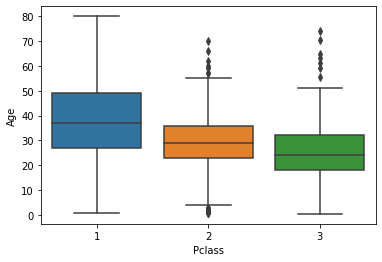

In [480]:
#to remove values we can eitehr put in dummy values or drop the column
#we can see the relationship between different features by making boxplots
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [481]:
#we can see that passengers traveling in first class tend to be of a higher age
#than second class, which in trun are of a higher median age than the third class
#with outliers present especially at the bottom two levels
#This could correlate with trends such as having more spending capacity as
#you grow older
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [482]:
#we can drop the cabin column as its riddled with NaN values
titanic_data.drop("Cabin",axis=1,inplace=True)

In [483]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [484]:
#we first calculate the average age of the data set
print(titanic_data["Age"].sum()/len(titanic_data))

23.79929292929293


<AxesSubplot:>

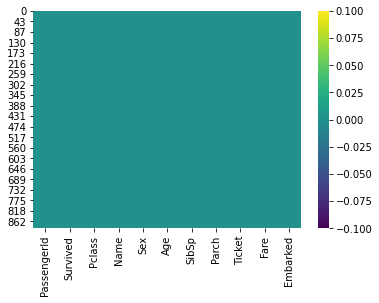

In [485]:
#we use the dropna function to remove all remaining null/NaN values
#the inplace parameter removes these values from the underlying data structure
#titanic_data
#we first replace all NaN values in the Age column with the average age
titanic_data["Age"].fillna(28.5275,inplace=True)
#we then remove the rows of all other NaN values in the Embarked column
titanic_data.dropna(inplace=True)
#in this case rows with null values are dropped as we plot the heatmap again
sns.heatmap(titanic_data.isnull(), cmap="viridis")

In [486]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [487]:
#we can see now that we have wrangled, or cleaned the data
#we now convert categorical variables into some dummy variables
#the main point is we cannot have string data as input for logistic 
#regression so this needs to be cleaned up and the conversion into dummy variables
#by the function get_dummies essentially performs one-hot encoding to convert Sex to
# a binary statistic which we can use in our regression
#to drop one column (redundant) and perform true dummy encoding we include
#the drop_first=True argument

In [488]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [489]:
#in embarked the values are also S, C, or Q depending on which city the
#passenger embarked from.  In this function we can also use the get_dummies
#function in the same manner
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [490]:
#we perform the same dummy encoding for passenger class
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [491]:
#now we have made the values are categorical
#now we have to concatenate all these different values into a data set
#along the columns (columnwise concatenation)
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [492]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [493]:
#based on our successful concatenation confirmed above, we can safely drop
#the pclass, embarked, and sex columns above
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'], axis=1, inplace=True)

In [494]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train & Test Data

In [495]:
#Build the model on the train data and predict the output on the test data
#our dependent variable (which we are predicting based on independent features) is dropped
X=titanic_data.drop("Survived", axis=1)
y=titanic_data["Survived"]

In [496]:
#split data into training and testing subset

In [497]:
from sklearn.model_selection import train_test_split

In [498]:
#test size gives a train test split of a ratio of 99 to 1% train to test
#random state controls the shuffling of data before applied to the split
#seed to rnd num generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)
from sklearn.linear_model import LogisticRegression

In [499]:
logmodel=LogisticRegression()

In [500]:
#we fit the logarithmic model to our training data
logmodel.fit(X_train,y_train)

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [501]:
#based on our fitted model we then test a sample subset of the original data we designated as the test subset
predictions = logmodel.predict(X_test)

## Check Accuracy

In [502]:
from sklearn.metrics import classification_report

In [503]:
#we then check the accuracy of the test subset
boxo = classification_report(y_test,predictions)
print (boxo)
#precision gives us what percentage of predictions were correct TP/(TP+FP)
#recall - tells us what percentage of positive cases we caught TP/(TP+FN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [504]:
from sklearn.metrics import confusion_matrix

In [505]:
confusion_matrix(y_test,predictions)

array([[4, 0],
       [0, 5]])

In [506]:
#confusion matrix tells how accurate values are
#           |predicted no, predicted yes,
# Actual No |    A              B
#Actual Yes |    C              D
#(A+D)/(A+B+C+D) gives us the actual correct output percentage
#A is also true negative, B is false positive
#C is false negative, and D is true positive

In [507]:
from sklearn.metrics import accuracy_score

In [508]:
accuracy_score(y_test,predictions)

1.0

In [511]:
#we now use the trained model to predict the survival rate of the actual test data
titanic_test = pd.read_csv("test.csv")

In [512]:
#we data wrangle in the same manner as above
titanic_test.drop("Cabin",axis=1,inplace=True)

In [513]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [514]:
print(titanic_test["Age"].sum()/len(titanic_test))
#we replace ages NaN values with the average age
titanic_test.fillna(24.044,inplace=True)

24.044258373205743


In [515]:
sex = pd.get_dummies(titanic_test['Sex'], drop_first=True)

In [516]:
embark=pd.get_dummies(titanic_test["Embarked"], drop_first=True)

In [517]:
Pcl=pd.get_dummies(titanic_test["Pclass"],drop_first=True)

In [518]:
titanic_test=pd.concat([titanic_test,sex,embark,Pcl],axis=1)

In [519]:
pidstore=titanic_test["PassengerId"]
titanic_test.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'], axis=1, inplace=True)

In [520]:
titanic_test.head(5)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [521]:

#we finally fit the model to the cleaned test data features to predict whether the test entrants survived or not
test_preds = logmodel.predict(X=titanic_test)

In [524]:
# we arrange the data as a data frame to write to a csv file
submission = pd.DataFrame({"PassengerId":pidstore,"Survived":test_preds})

In [525]:
submission.to_csv("outputof_logreg_titanic_RoDewan.csv",index=False)